# Birth Rate Analysis

## 1. Loading Data

In [7]:
import pandas as pd

births = pd.read_csv("Data\\births.csv")

print(births.head())

   year  month  day gender  births
0  1969      1  1.0      F    4046
1  1969      1  1.0      M    4440
2  1969      1  2.0      F    4454
3  1969      1  2.0      M    4548
4  1969      1  3.0      F    4548


In [8]:
births['day'].fillna(0, inplace=True)
births['day'] = births['day'].astype(int)

In [9]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index = 'decade', columns= 'gender', aggfunc= 'sum')
print(births.head())

   year  month  day gender  births  decade
0  1969      1    1      F    4046    1960
1  1969      1    1      M    4440    1960
2  1969      1    2      F    4454    1960
3  1969      1    2      M    4548    1960
4  1969      1    3      F    4548    1960


## 2. Visualize Data

<function matplotlib.pyplot.show(close=None, block=None)>

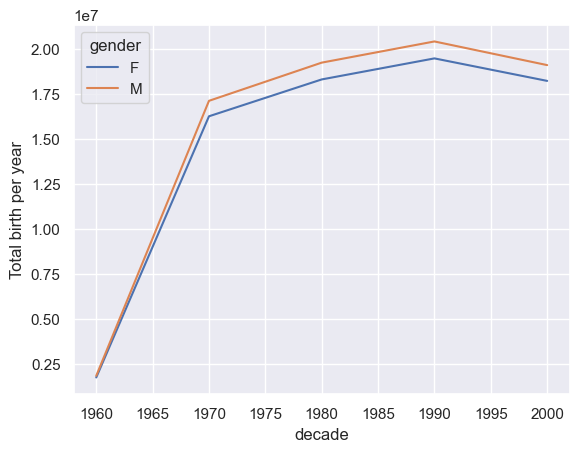

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

birth_decade = births.pivot_table('births', index = 'decade', columns= 'gender', aggfunc= 'sum')
birth_decade.plot()
plt.ylabel("Total birth per year")
plt.show

The initial analysis shows that male births outnumber female births in every decade. This observation is made by calculating the total number of births by gender for each decade and visualizing it using a line plot.

## 3. Data Exploration

In [12]:
import numpy as np

quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

In [14]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
births['day'] = births['day'].astype(int)
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format = '%Y%m%d')
births['dayofweek'] = births.index.dayofweek

C:\Users\cmos\AppData\Local\Temp\ipykernel_5356\1108328529.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])


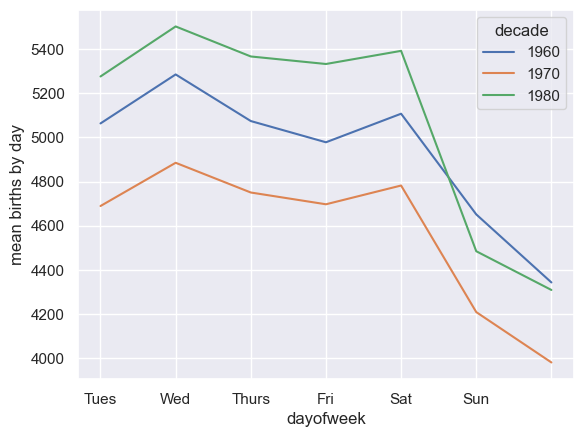

In [15]:
births.pivot_table('births', index = 'dayofweek', columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day')
plt.show()

The plot reveals that births are slightly less common on weekends compared to weekdays. This finding provides insights into birth patterns based on the day of the week.

In [16]:
births_month = births.pivot_table('births', [births.index.month, births.index.day])
print(births_month.head())

births_month.index = [pd.datetime(2012, month, day) for (month, day) in  births_month.index]
print(births_month.head())

       births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625
              births
2012-01-01  4009.225
2012-01-02  4247.400
2012-01-03  4500.900
2012-01-04  4571.350
2012-01-05  4603.625


C:\Users\cmos\AppData\Local\Temp\ipykernel_5356\1784414865.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  births_month.index = [pd.datetime(2012, month, day) for (month, day) in  births_month.index]


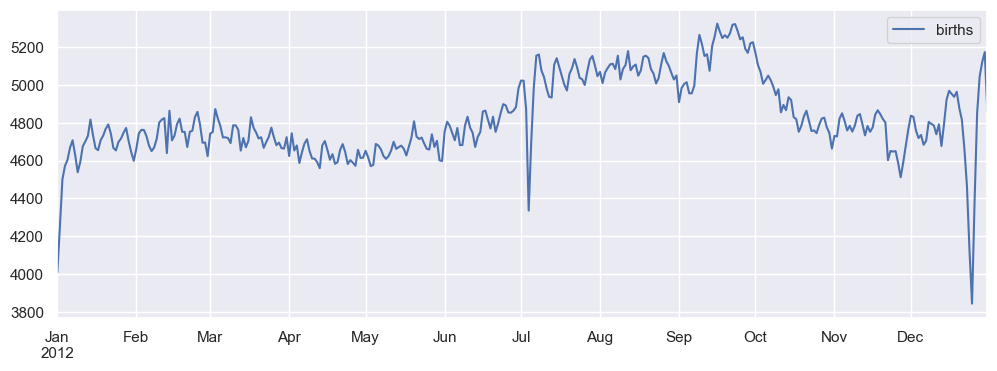

In [17]:
fig, ax = plt.subplots(figsize=(12, 4))
births_month.plot(ax = ax)
plt.show()

The plot of births by day of the year reveals patterns in birth rates throughout the year, potentially influenced by factors such as holidays, weather, or cultural events.